**[Machine Learning for Insights Home Page](kaggle.com/learn/ml-insights).**

---

# Partial Dependence Plots

While feature importance shows what variables most affect predictions, partial dependence plots give us more detail about how a feature affects predictions.

This is useful to answer questions like:

* Controlling for all other house features, what impact do longitude and latitude have on home prices? To restate this, how would similarly sized houses be priced in different areas.

* Are predicted health differences between two groups due to differences in their diets, or due to some other factor?

If you are familiar with linear or logistic regression models, partial dependence plots can be interepreted similarly to the coefficients in those models.  Though, compared to those model coefficients, partial dependence plots can capture far more complex patterns from your data.  If you aren't familiar with linear or logistic regressions, don't worry about this comparison.

We will show a couple examples, explain the interpretation of these plots, and then review the code to create these plots.

# How it Works

TODO: CHANGE TO SOCCER EXAMPLE
Like permutation importance, **partial dependence plots are calculated after a model has been fit.**  The model is fit on real data.  In that real data, houses in different parts of town may differ in myriad ways (different ages, sizes, etc.)  

After the model is fit, we consider a single house in the dataset. For concreteness, imagine a house with 2 bedrooms, 2 bathrooms, a large lot, an age of 10 years, etc. 

We then use the model to predict the price of that house, but we change the distance variable before making a prediction.  We first predict the price for that house when sitting distance to 4.  We then predict it's price setting distance to 5.  Then predict again for 6.  And so on.  We trace out how predicted price changes (on the vertical axis) as we move from small values of distance to large values (on the horizontal axis).

In this description, we used only a single house.  Interactions between features may cause the plot for a single house to be atypical.  So, we repeat that mental experiment with multiple houses, and we plot the average predicted price on the vertical axis.  

You'll see some negative numbers.  That doesn't mean the price would sell for a negative price.  Instead it means the prices would have been less than the actual average price for that distance.

# Code Example

First, we have build a model as you've already seen. Model building still isn't our focus, so this is very rudimentary.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('../input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

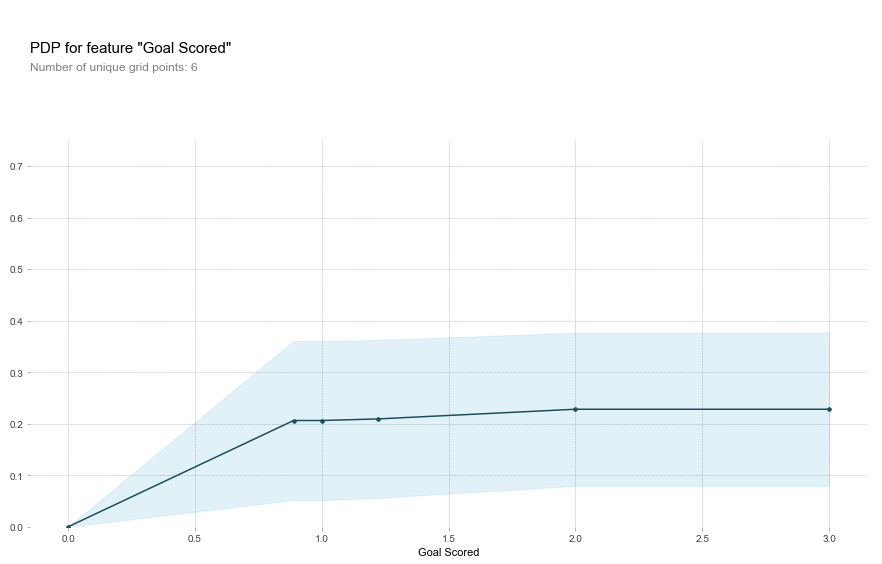

In [43]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

pdp_goals = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature='Goal Scored')

pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

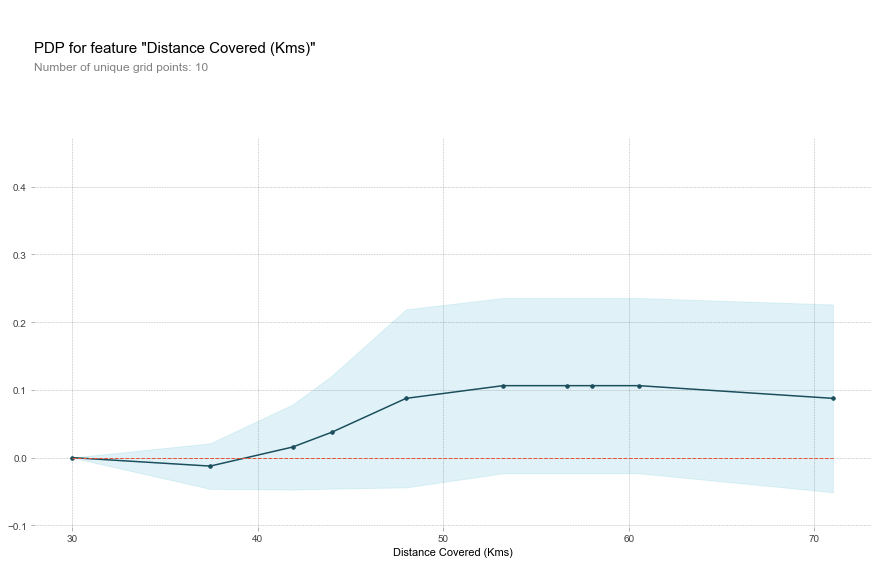

In [42]:
pdp_dist = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature='Distance Covered (Kms)')

pdp.pdp_plot(pdp_possession, 'Distance Covered (Kms)')
plt.show()

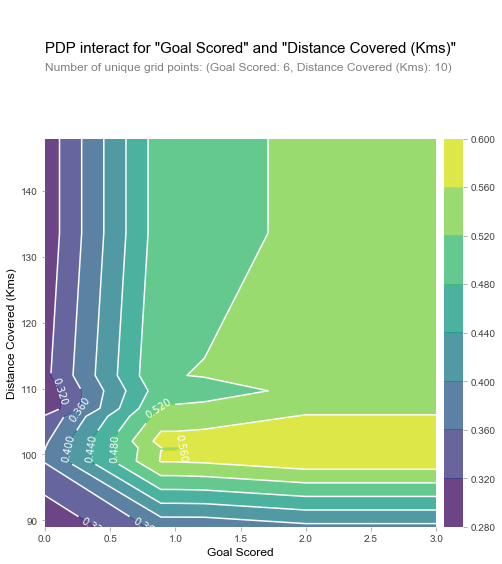

In [41]:
inter1  =  pdp.pdp_interact(model=my_model, dataset=val_X, model_features=feature_names, features=['Goal Scored', 'Distance Covered (Kms)'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['Goal Scored', 'Distance Covered (Kms)'], plot_type='contour')
plt.show()


# Your Turn
Now you get to create and interpret some partial dependence plots.

---
**[Course Home Page](https://www.kaggle.com/learn/ml-insights)**